In [69]:
import pandas as pd
import torch
import torchtext.vocab as vocab
from plotnine import aes, geom_text, ggplot, labs
from sklearn.manifold import TSNE

In [70]:
# import GloVe
glove_dim = 100
glove = vocab.GloVe(name="6B", dim=glove_dim)

In [71]:
# Get closest words from word input
def get_embedding_vector(word):
    word_index = glove.stoi[word]
    emb = glove.vectors[word_index]
    return emb

In [72]:
def get_closest_words_from_word(word, max_n=5):
    word_emb = get_embedding_vector(word)
    distances = [
        (w, torch.dist(word_emb, get_embedding_vector(w)).cpu().item())
        for w in glove.itos
    ]
    dist_sort_filt = sorted(distances, key=lambda x: x[1])[:max_n]
    return [item[0] for item in dist_sort_filt]

In [73]:
get_closest_words_from_word(word="chess", max_n=10)

['chess',
 'backgammon',
 'grandmasters',
 'grandmaster',
 'scrabble',
 'billiards',
 'xiangqi',
 'kasparov',
 'snooker',
 'olympiad']

In [74]:
words = []
categories = ["duck", "lotus", "juice", "photo"]

In [75]:
df_word_cloud = pd.DataFrame({"category": [], "word": []})

for category in categories:
    print(category)
    closest_words = get_closest_words_from_word(word=category, max_n=15)
    temp = pd.DataFrame(
        {"category": [category] * len(closest_words), "word": closest_words}
    )
    df_word_cloud = pd.concat([df_word_cloud, temp], ignore_index=True)

duck
lotus
juice
photo


In [76]:
# get the 100 dimension word embedding for all words
n_rows = df_word_cloud.shape[0]
n_cols = glove_dim
X = torch.empty((n_rows, n_cols))
for i in range(n_rows):
    current_word = df_word_cloud.loc[i, "word"]
    X[i, :] = get_embedding_vector(current_word)
    print(f"{i}: {current_word}")

0: duck
1: rabbit
2: lame
3: cat
4: goose
5: pig
6: daffy
7: confit
8: goat
9: chicken
10: dog
11: buck
12: lamb
13: porky
14: mallard
15: lotus
16: manzi
17: onyx
18: ibm
19: corniculatus
20: sap
21: borland
22: thunderbird
23: smartsuite
24: sametime
25: oracle
26: testarossa
27: jaguar
28: exige
29: lenovo
30: juice
31: lemon
32: lime
33: vinegar
34: grapefruit
35: syrup
36: ginger
37: soda
38: yogurt
39: pineapple
40: juices
41: brandy
42: sugar
43: tomato
44: zest
45: photo
46: photograph
47: photos
48: photographs
49: picture
50: poster
51: pictures
52: page
53: graphic
54: copy
55: print
56: accompanying
57: illustration
58: caption
59: photographer


In [77]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X.cpu().numpy())

In [78]:
df_word_cloud["x"] = X_tsne[:, 0]
df_word_cloud["y"] = X_tsne[:, 1]

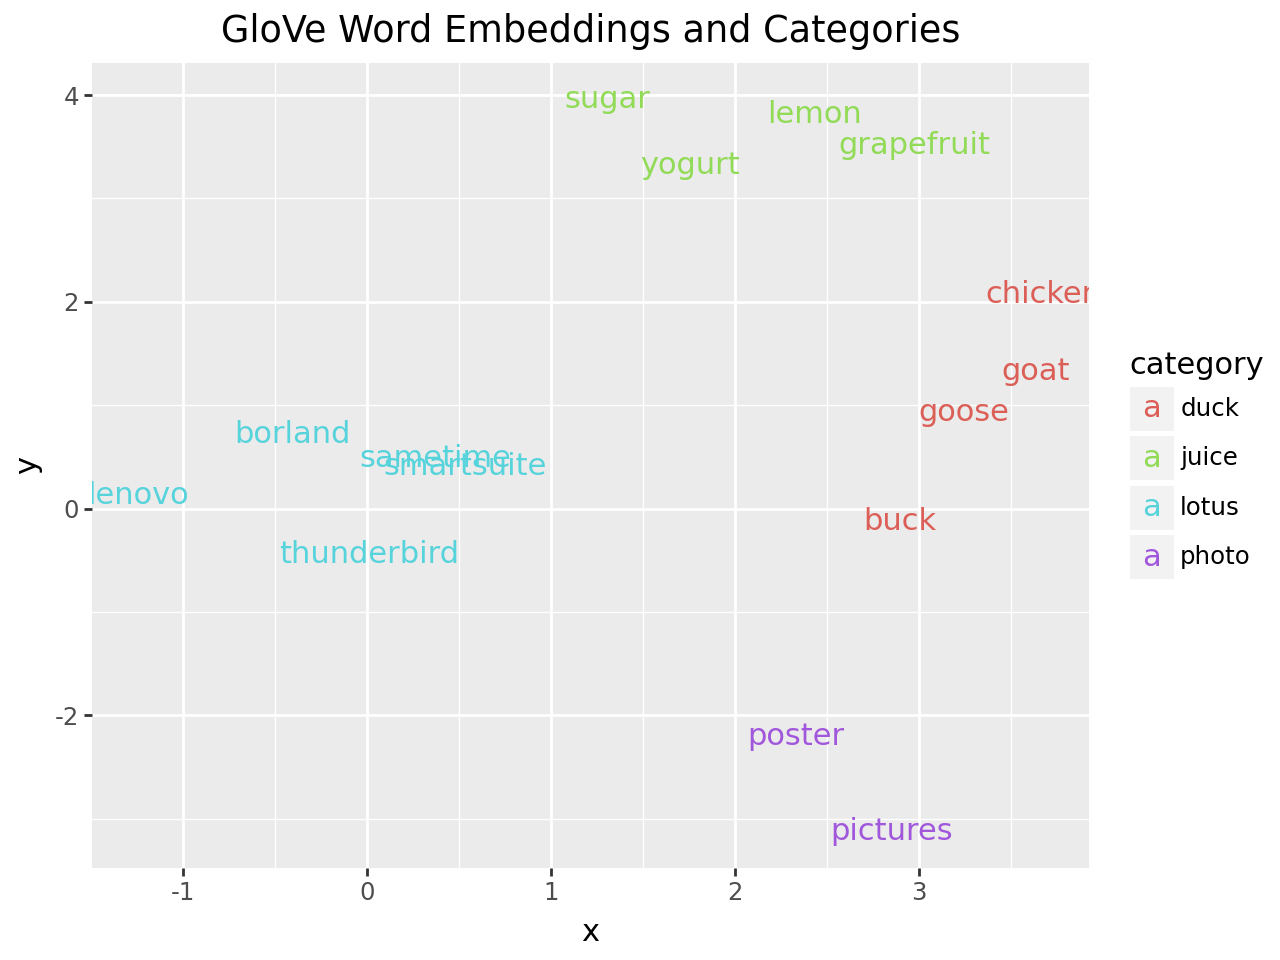

In [79]:
(
    ggplot(data=df_word_cloud.sample(15))
    + aes(x="x", y="y", label="word", color="category")
    + geom_text()
    + labs(title="GloVe Word Embeddings and Categories")
)